
# Project: Investigating "No-show appointments" Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Our dataset named "No-show appointments" is a dataset made depends on the results of 110.527 appointment with different genders and for different medical conditions in Brazil. This dataset is made for finding out the reasons behind why may patients don't come after there first appointment to what is called follow-up 
    The dataset consists of 14 variables all of them are kinda simple except scholarship which means that this patient has something like medical insurance. There are 3 variables specific to the appointment which is the Id and the date and the rest are for decribing the demographics of the patient and his/her medical condition
    
  > *note: ‘No’ or "0" in 'no_show' column means that patient showed up to their appointment and ‘Yes’ or "1" means they did not show up.



### Question(s) for Analysis
> Q1: Is having scholarship (involving in Bolsa Familia) increases the possibility of coming back to the follow-up?

> Q2: Is receiving an SMS increases the possibility of coming back to the follow-up?
  
> Q3: Gender effect on the possibility of coming back to the follow-up?

> Q4: Does neighborhood affects coming back?

> Q5 : Age groups and coming back


**sources used in this project**
- https://stackoverflow.com/questions/19726029/how-can-i-make-pandas-dataframe-column-headers-all-lowercase (changing all rows to lowercase)
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html (changing x axis values)
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unstack.html (using unstack)

In [60]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [61]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.3

<a id='wrangling'></a>
## Data Wrangling
    Goals:
        1- Loading data and take a general check
        2- Checking data types
        3- Checking duplicates 
        4- Picking the columns that we are gonna need in analysis
        5- checking general errors

In [3]:
# Loading data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#getting columns and rows number
df.shape

(110527, 14)

We have 110527 row and 14 column in our dataset

In [5]:
#Statisitical overview
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Age less than 0 and 115 is very old so we have to make ranges

Handcap has value more than 1 and it has to be 0 and 1 only

In [6]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Maybe this woman was pregnant

In [7]:
#cheching if there's any null values and chcecing the types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#making sure that there's no null values
df.isnull().sum().sum()

0

No null values

In [9]:
#number of unique values of each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

we have two things here:

    1- Handcap has 5 unique values and it must be only two
    2- Age has 104 unique value so we have to make ranges

In [10]:
df['PatientId'].duplicated().sum()

48228

In [11]:
df[['PatientId','AppointmentDay']].duplicated().sum()

8719

--As we can see there are 48228 duplication in patients whcih means that a follow up for those patients so I will remove them so they don't interfere with the results as most of the patients needs only 2 visits which are the basic visit and the follow up

--Also there are 8719 duplicated visites and those will be removed too

## Data cleaning
     We have many things to do:
        1- Rename all the columns into lowercase
        2- Change "No-Show" to "came_back" and "Hipertension" to "hypertension"
        3- Change Yes and No in "came_back" to 0 and 1 (1 for Yes and 0 for No)
        4- Create ranges for Age
        5- Remove row values of Age with less than 0
        6- Remove Handcap values with more than 1
        8- Remove duplicates of patients and the appointments
        8- Remove unnecessary columns

In [12]:
#Fixing the names (1,2)
df.rename(columns={'No-show':'came_back',"Hipertension":"hypertension"}, inplace = True)
df.columns = df.columns.str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,came_back
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# Change came_back values to 0,1 (3)
df['came_back'].replace('No',1,inplace=True)
df['came_back'].replace('Yes',0,inplace= True)

In [47]:
# Create ranges for age (4)
bins = [0,20,40,60,80,100,120]
ranges = ["0-20","20-40","40-60","60-80","80-100","100-120"]
#df["age_groups"]= pd.cut(df['age'],bins=bins, labels= ranges)
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,came_back
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [15]:
# Remove row values of Age with less than 0
df[df['age'] == -1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,came_back
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,1


In [16]:
# Remove Handcap with more than 1 (6)
df.drop(df[(df['handcap'] > 1)].index, inplace=True)
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,came_back
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,1
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1


In [17]:
#remvoing duplicates of appointments
df.drop_duplicates(['patientid','appointmentday'],inplace=True)

In [18]:
#chcecking that they are removed
df[['patientid','appointmentday']].duplicated().sum()

0

In [19]:
#remvoing duplicates of appointments
df['patientid'].drop_duplicates(inplace = True)

In [20]:
df[['patientid','appointmentday']].duplicated().sum()
df['patientid'].duplicated().sum()

0

In [21]:
#Removing unnecessary columns
df.drop(columns={'scheduledday','appointmentday','patientid','appointmentid'},axis= 1,inplace = True)

In [22]:
#Making sure they are removed
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,came_back
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis

   ## An overview of the factors

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06ff71b828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f06ff4ba278>]], dtype=object)

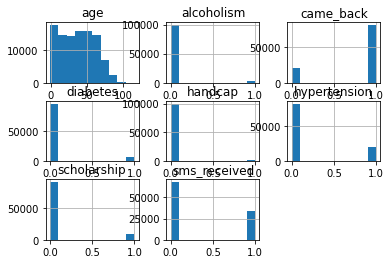

In [33]:
df.hist()

### Is having scholarship (involving in Bolsa Familia) increases the possibility of coming back to the follow-up?

In [23]:
with_scho_yes = df[(df['came_back']==1) & (df['scholarship']==1)].shape[0]
with_scho_no = df[(df['came_back']==0) & (df['scholarship']==1)].shape[0]
no_scho_yes = df[(df['came_back']==1) & (df['scholarship']==0)].shape[0]
no_scho_no = df[(df['came_back']==0) & (df['scholarship']==0)].shape[0]
percent_with_Scho = (with_scho_yes/(with_scho_yes + with_scho_no))*100
percent_no_Scho = (no_scho_yes/(no_scho_yes + no_scho_no))*100
percent_with_Scho
percent_no_Scho

80.3227741126438

76% of the people who has schlarship went to the follow-up

80% of people with no scholarship went to the follow up

In [69]:
def plot_info(x_label, y_label, title):
    plt.xlabel(  x_label )
    plt.ylabel(y_label)
    plt.title( title )

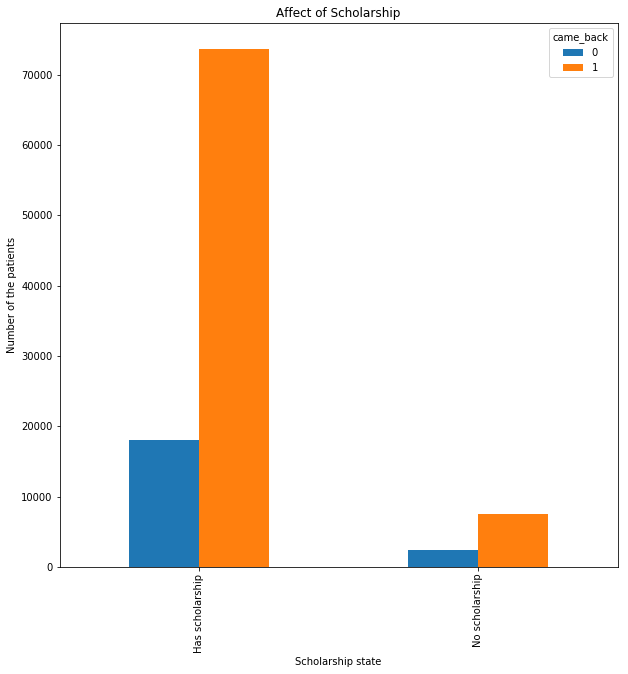

In [70]:
df.groupby('scholarship').came_back.value_counts().unstack().plot(kind='bar',figsize= (10,10))
plot_info("Scholarship state","Number of the patients",'Affect of Scholarship')
plt.xticks([0,1],["Has scholarship","No scholarship"])

As we can see in the chart the missed visits in both case are close if we compare it to the total number( comparing missed visits in people having scholarship and the same for people who don't have)

- from the numbers and the chart we can say that scholarship doesn't have huge impact

### Does receiving an SMS increases the possibility of coming back to the follow-up?

In [31]:
with_sms_yes = df[(df['came_back']==1) & (df['sms_received']==1)].shape[0]
with_sms_no = df[(df['came_back']==0) & (df['sms_received']==1)].shape[0]
no_sms_yes = df[(df['came_back']==1) & (df['sms_received']==0)].shape[0]
no_sms_no = df[(df['came_back']==0) & (df['sms_received']==0)].shape[0]
percent_with_sms = (with_sms_yes/(with_sms_yes + with_sms_no))*100
percent_no_sms = (no_sms_yes/(no_sms_yes + no_sms_no))*100
percent_no_sms
percent_with_sms

72.61346311715727

72% of the patients who received sms went to their follow-up 

80% of the patients who didn't receive SMS went to their follow-up 


([<matplotlib.axis.XTick at 0x7f06f4310390>,
 <a list of 2 Text xticklabel objects>)

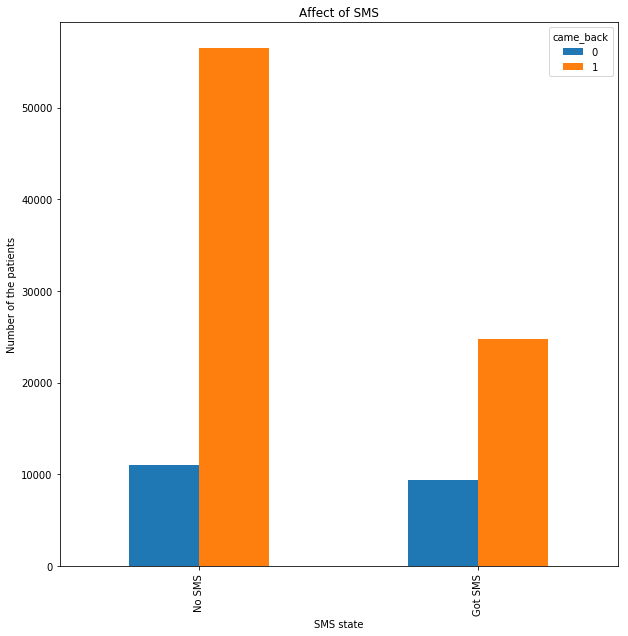

In [72]:
df.groupby('sms_received').came_back.value_counts().unstack().plot(kind='bar',figsize = (10,10))
plot_info("SMS state","Number of the patients",'Affect of SMS')
plt.xticks([0,1],["No SMS","Got SMS"])

As we can see the missed visits are kinda close in both cases

        so from the numbers and chart there' no direct association between SMS and showing up for the visits

### Gender effect on the possibility of coming back to the follow-up


Text(0.5,1,'Gender Effect')

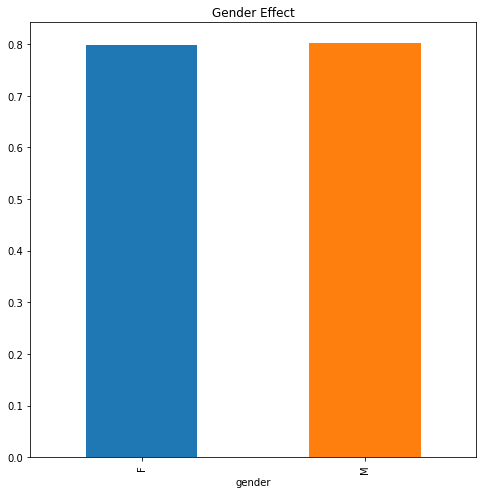

In [29]:
df.groupby('gender').came_back.mean().plot(kind= 'bar',figsize= (8,8))
plt.title('Gender Effect')

Most of the patients are females maybe because they worry too much about their healty state but there were no observed difference between both genders

### Does neighborhood affects coming back?


Text(0.5,1,'Neighbourhood effect')

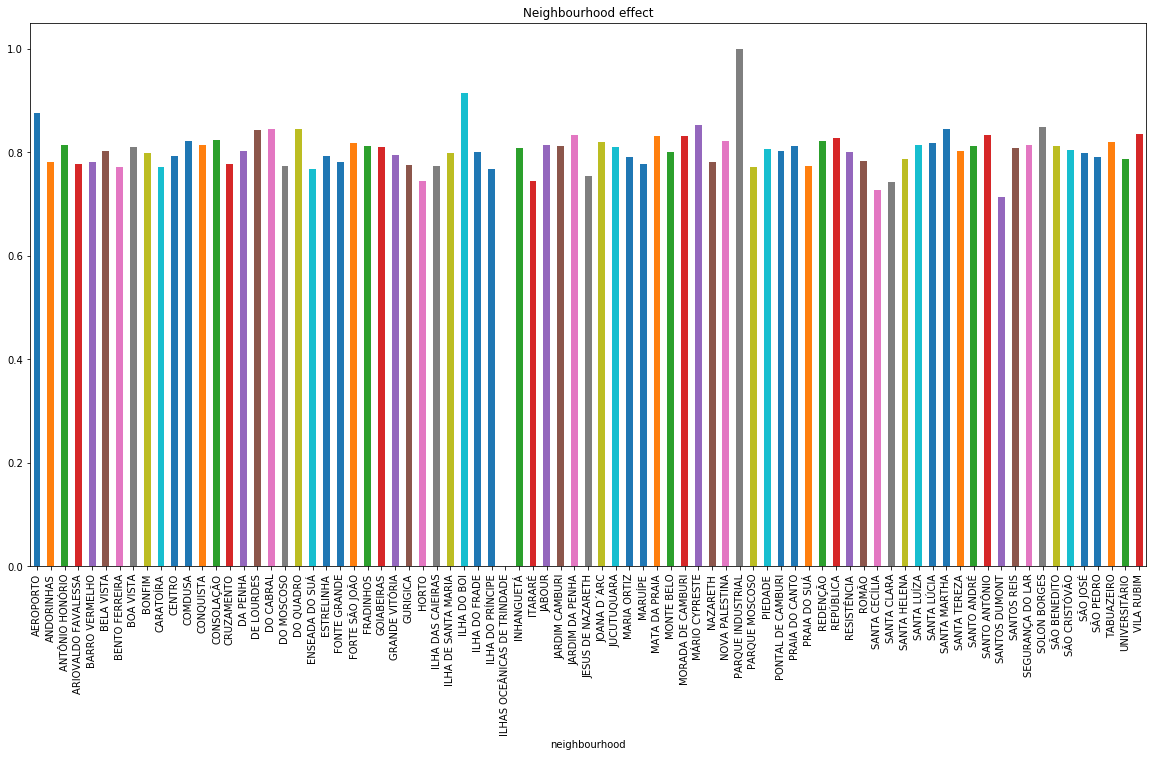

In [59]:
df.groupby('neighbourhood').came_back.mean().plot(kind= 'bar',figsize= (20,10))
plt.title('Neighbourhood effect')

As we can see in the chart neighbourhood has no direct effect on coming back as the results are kinda close but there are two special neighbourhood which are ILHAS OCEÂNICAS DE TRINDADE and this one has zero coming back and PARQUE INDUSTRIAL which all patients came bak to the follow-u

## Age groups and coming back

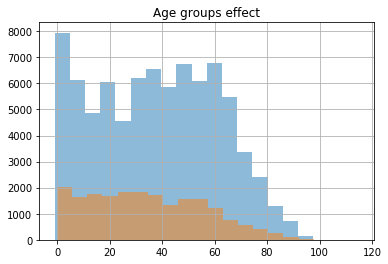

In [57]:
showed = df.came_back  == 1
not_showed = df.came_back == 0
df.age[showed].hist(alpha=0.5, bins=20, label='showed')
df.age[not_showed].hist(alpha=0.5, bins=20, label='not_showed')
plt.title('Age groups effect');

As we can see most of the patients are kinda young and there's a decrease in numbers of 20 to 30 years as most of the people in this category has a good healthe state and they are busy to go to the doctor

<a id='conclusions'></a>
## Conclusions

> After picking four variables for my invistagation which are (Scholarship, Gender, Neighbourhood , age and SMS) I found out that those factors has weak impact or it may impact but indirectly as follows:

>> 76% of the people who has schlarship went to the follow-up and 80% of people with no scholarship went to the follow up which not considered a huge difference 

>> 72% of the patients who received sms went to their follow-up 80% of the patients who didn't receive SMS went to their follow-up and it's supposed to br the opposite if there's a correlation

>> All neighbourhood had close values 

>> Gender didn't have huge difference as we saw in the chart

>> Age groups has a drop in the young patinets going to the doctor and dollowing up too maybe because of the good health state


   - so we have to investigate the other variables for example the medical conditiosn or find other variables to investigate or combine the variables to create varialbels applicable to the other questions

## Limitations
> There are a lot of hidden data like the traffic in the neighborhood maybe it's harder to go to a visit in specific neighbourhoods also the communication process maybe the hospital called the patient or something other than SMS

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0